## 2D FT of letters

In teaching we have found that the **Fraunhofer diffraction** patterns produced by apertures with the shape of letters 
provide a useful exploration of the concepts of single slit, double slit diffraction, scaling, circular symmetry, etc.

As we can write the Fraunhofer diffraction pattern in terms of a **2D Fourier transform**, see **Opticsf2f Section 6.6**, it is easy to simulate in python using the numpy.fft module.

In terms of coding the more involved part is to create the aperture function as we need to choose a font and fontsize and then save this pattern as a
2D array. One was to do this is to make a figure with the required letter or letter and then safe the data to an array.

Below we choose sans-serif fonts which are the relatively simple.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'

Let's check our python version. This code has been checked with 3.7 and 3.8.

In [2]:
from platform import python_version

print(python_version())

3.8.10


Enter letters in letter string. The code draws the letter and saves the data from the image in the array bw.
Note that the figsize determines the number of points. Default is 100 dpi so (16,16) is (1600,1600) array.

The command plt.ioff() means that the plot used to create the image data does not display. 

Finally we turn plots back on to look at the array we have created using imshow.

--- 0.26136207580566406 seconds ---


<Figure size 1600x1600 with 0 Axes>

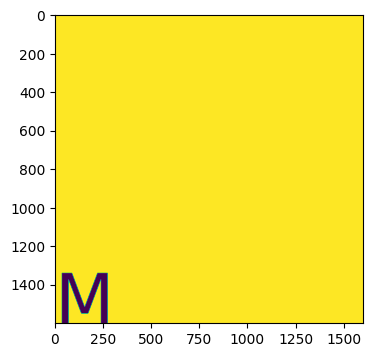

In [3]:
start_time = time.time()

letter = 'M'
zoom = 4
cmax = 0.1

'''
letter = 'OXO'
zoom = 2
cmax = 1e-8
'''

filename = letter + '.png'

fig = plt.figure(1,figsize = (16,16),dpi=100)
plt.ioff()
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])
ax.text(0.0,0.0, letter, fontsize=256)
ax.axison = False

fig.canvas.draw()
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype = np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
bw = np.mean(data,-1)/255.0
bw -=1

plt.clf()
plt.ion()
fig, ax = plt.subplots(1,1,figsize = (4,4),dpi=100)
ax.imshow(bw)

print("--- %s seconds ---" % (time.time() - start_time))

Now we do a 2D FFT on the 2D input array. We zoom in on the centre to see more detail.

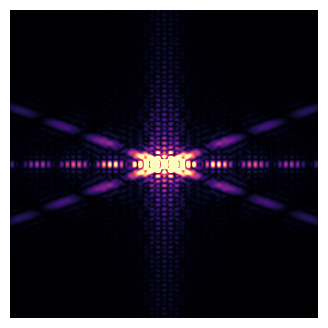

--- 0.17249274253845215 seconds ---


In [4]:
from numpy.fft import fft, fft2, ifft, fftshift

start_time = time.time()

F=fftshift(fft2(bw))
Fr=F.real
Fi=F.imag
F2=Fr*Fr+Fi*Fi
F2 /=np.max(F2)
x_pts, y_pts = np.shape(F2)
F2zoom = F2[int(x_pts/2)-int(x_pts/(2*zoom)):int(x_pts/2)+int(x_pts/(2*zoom)),int(y_pts/2)-int(y_pts/(2*zoom)):int(y_pts/2)+int(y_pts/(2*zoom))]



fig, ax = plt.subplots(1,1,figsize = (4,4),dpi=100)
ax.axison = False
ax.imshow(F2zoom**0.5, clim = [0,cmax],cmap='magma')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [5]:
fig.savefig(filename, dpi=100, facecolor='white', edgecolor='white')

Finally, we do a **sequence of letters**, similar to images at the **end of Chapter 6**.

<Figure size 1600x1600 with 0 Axes>

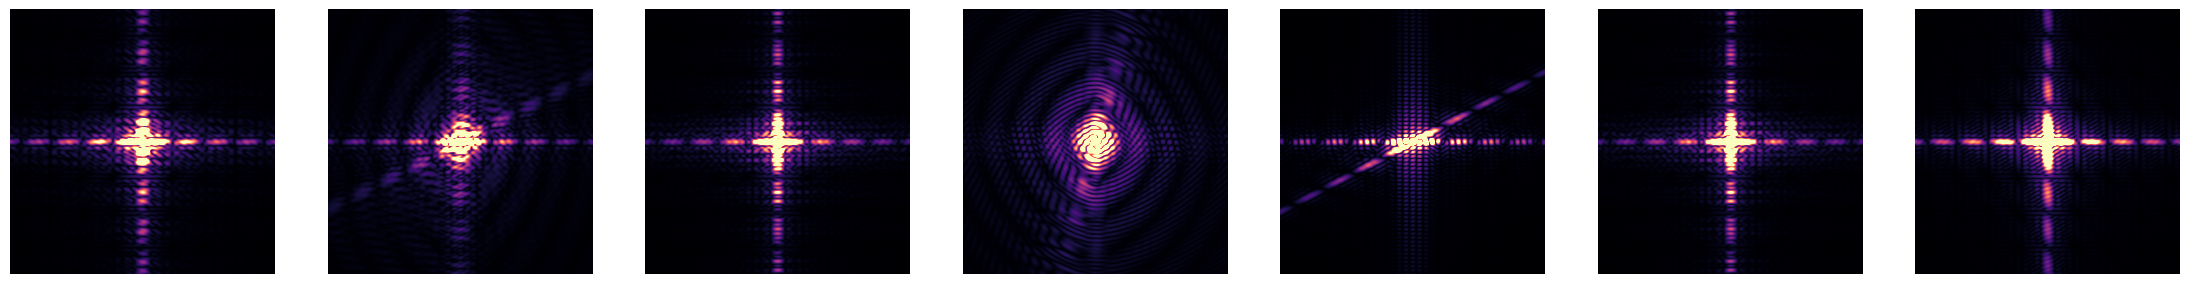

In [6]:
zoom = 4
cmax = 0.1

fs = 16
n_pts = int(fs*100/zoom)
letters = ['Q', 'L', 'M'] # can either enter letters manually

word = 'FRESNEL' # or write a word and split it into a list
letters = list(word)

num =np.size(letters)
                    
Fourier = np.zeros((n_pts,n_pts,num))

jj = 0
for letter in letters:
    fig = plt.figure(1,figsize = (fs,fs),dpi=100)
    plt.ioff()
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])
    ax.text(0.0,0.0, letter, fontsize=256)
    ax.axison = False

    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype = np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    bw = np.mean(data,-1)/255.0
    bw -=1
    F=fftshift(fft2(bw))
    Fr=F.real
    Fi=F.imag
    F2=Fr*Fr+Fi*Fi
    F2 /=np.max(F2)
    x_pts, y_pts = np.shape(F2)    
    F2zoom = F2[int(x_pts/2)-int(x_pts/(2*zoom)):int(x_pts/2)+int(x_pts/(2*zoom)),int(y_pts/2)-int(y_pts/(2*zoom)):int(y_pts/2)+int(y_pts/(2*zoom))]
    Fourier[:,:,jj] += F2zoom**0.5
    plt.clf()
    jj +=1

plt.ion()

rows = 1
fig, axs = plt.subplots(rows,num, figsize = (4*num,4))

for jj in range(0,num):
    axs[jj].axison = False
    axs[jj].imshow(Fourier[:,:,jj],clim=[0,cmax],cmap='magma')

plt.show()

In [7]:
filename = word + '.png'
fig.savefig(filename, dpi=100)